<a href="https://colab.research.google.com/github/RUMONMD89/Data-Science/blob/main/DS7%20%20Statistical%20analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04

## 4.1 記述統計(descriptive statistics)

### 4.1.1 平均・分散・標準偏差(mean, variance, standard deviation)

In [ ]:
import numpy as np
import pandas as pd

x = [165, 170, 175, 180, 185]
np.mean(x) # リストの場合
#> 175.0

x = np.array( # アレイ
    [165, 170, 175, 180, 185])
x.mean() # np.mean(x)も可
#> 175.0

x = pd.Series( # シリーズ
    [165, 170, 175, 180, 185])
x.mean() # np.mean(x)も可
#> 175.0

175.0

In [ ]:
n = len(x) # サンプルサイズ
sum(x) / n
#> 175.0

175.0

In [ ]:
y = [173, 174, 175, 176, 177]
np.mean(y)
#> 175.0

175.0

In [ ]:
np.var(x, ddof=1) # xの分散
#> 62.5

np.var(y, ddof=1) # yの分散
#> 2.5

2.5

In [ ]:
sum((x - np.mean(x))**2) / (n - 1)
#> 62.5

62.5

In [ ]:
np.std(x, ddof=1) # xの標準偏差
#> 7.905694150420948

np.std(y, ddof=1) # yの標準偏差
#> 1.5811388300841898

1.5811388300841898

In [ ]:
np.var(x, ddof=1)**0.5 # xの標準偏差
#> 7.905694150420948

7.905694150420948

In [ ]:
s = pd.Series(x)
s.describe()
#> count      5.000000 （データ数）
#> mean     175.000000 （平均）
#> std        7.905694 （標準偏差）
#> min      165.000000 （最小値）
#> 25%      170.000000 （第1四分位数）
#> 50%      175.000000 （中央値）
#> 75%      180.000000 （第3四分位数）
#> max      185.000000 （最大値）
#> dtype: float64

count      5.000000
mean     175.000000
std        7.905694
min      165.000000
25%      170.000000
50%      175.000000
75%      180.000000
max      185.000000
dtype: float64

In [ ]:
# s.describe()で計算済み

#### 4.1.1.1 不偏分散とその非負の平方根(unbiased variance and its nonnegative square root)

In [ ]:
x = [165, 170, 175, 180, 185]

np.var(x, ddof=1) # 不偏分散
#> 62.5

np.var(x, ddof=0) # 標本分散
#> 50.0

50.0

In [ ]:
np.std(x, ddof=1) # √不偏分散
#> 7.905694150420949

np.std(x, ddof=0) # √標本分散
#> 7.0710678118654755

7.0710678118654755

In [ ]:
np.std(x, ddof=1) / len(x)**0.5
#> 3.5355339059327373

3.5355339059327373

### 4.1.2 データフレームの統計処理(Statistical processing of dataframes)

In [ ]:
import numpy as np
import pandas as pd

my_df = pd.DataFrame({
    'name':    ['A', 'B', 'C', 'D'],
    'english': [ 60,  90,  70,  90],
    'math':    [ 70,  80,  90, 100],
    'gender':  ['f', 'm', 'm', 'f']})

#### 4.1.2.1 列ごとの集計(Aggregation by column)

In [ ]:
my_df['english'].var(ddof=1)
# あるいは
np.var(my_df['english'], ddof=1)

#> 225.0

225.0

In [ ]:
my_df.var()
# あるいは
my_df.apply('var')
# あるいは
my_df.iloc[:, [1, 2]].apply(
    lambda x: np.var(x, ddof=1))

#> english    225.000000
#> math       166.666667
#> dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


english    225.000000
math       166.666667
dtype: float64

In [ ]:
my_df.describe()
#>        english        math
#> count      4.0    4.000000
#> mean      77.5   85.000000
#> std       15.0   12.909944
#> min       60.0   70.000000
#> 25%       67.5   77.500000
#> 50%       80.0   85.000000
#> 75%       90.0   92.500000
#> max       90.0  100.000000

,english,math
count,4.0,4.000000
mean,77.5,85.000000
std,15.0,12.909944
min,60.0,70.000000
25%,67.5,77.500000
50%,80.0,85.000000
75%,90.0,92.500000
max,90.0,100.000000


#### 4.1.2.2 分割表とグループごとの集計(Contingency table and aggregation by group)

In [ ]:
from collections import Counter
Counter(my_df.gender)
#> Counter({'f': 2, 'm': 2})

# あるいは

my_df.groupby('gender').apply(len)
#> gender
#> f    2
#> m    2
#> dtype: int64

gender
f    2
m    2
dtype: int64

In [ ]:
my_df2 = my_df.assign(
    excel=my_df.math >= 80)
pd.crosstab(my_df2.gender,
            my_df2.excel)
#> excel   False  True
#> gender
#> f           1      1
#> m           0      2

excel,False,True
gender,,
f,1,1
m,0,2


In [ ]:
my_df.groupby('gender').mean()
# あるいは
my_df.groupby('gender').agg('mean')
# あるいは
my_df.groupby('gender').agg(np.mean)

#>         english  math
#> gender
#> f          75.0  85.0
#> m          80.0  85.0

,english,math
gender,,
f,75.0,85.0
m,80.0,85.0


## 4.4 統計的推測(statistical inference)

### 4.4.1 検定

In [ ]:
from statsmodels.stats.proportion import binom_test, proportion_confint

binom_test(count=2,                 # 当たった回数
           nobs=15,                 # くじを引いた回数
           prop=4 / 10,             # 当たる確率（仮説）
           alternative='two-sided') # 両側検定（デフォルト）
                                    # 左片側検定なら'smaller'
                                    # 右片側検定なら'larger'
#> 0.03646166155263999

0.036461661552639996

#### 4.4.1.1 補足：p値とは何か(Side note: what is a p-value)

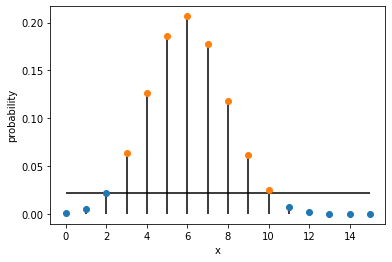

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

t = 4 / 10                        # 当たる確率
n = 15                            # くじを引いた回数
x = np.array(range(0, n + 1))     # 当たった回数
my_pr  = stats.binom.pmf(x, n, t) # x回当たる確率
my_pr2 = stats.binom.pmf(2, n, t) # 2回当たる確率

my_data = pd.DataFrame({'x': x, 'y1': my_pr, 'y2': my_pr})
my_data.loc[my_pr >  my_pr2, 'y1'] = np.nan # 当たる確率が，2回当たる確率超過
my_data.loc[my_pr <= my_pr2, 'y2'] = np.nan # 当たる確率が，2回当たる確率以下
ax = my_data.plot(x='x', style='o', ylabel='probability',
                  legend=False)         # 凡例を表示しない．
ax.hlines(y=my_pr2, xmin=0, xmax=15)    # 水平線
ax.vlines(x=x,      ymin=0, ymax=my_pr) # 垂直線

### 4.4.2 推定

In [ ]:
## Google colabではクラッシュするので実行はパスしています
#from statsmodels.stats.proportion import proportion_confint
#a = 0.05
#proportion_confint(
#    count=2, # 当たった回数
#    nobs=15, # くじを引いた回数
#    alpha=a, # 有意水準（省略可）
#    method='binom_test')
##> (0.024225732468536626,
##>  0.3967139842509865)

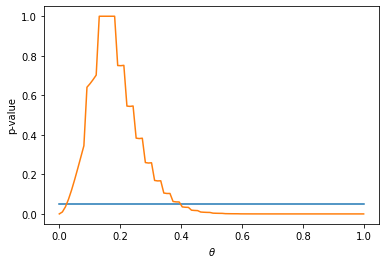

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
a = 0.05 # 有意水準
tmp = np.linspace(0, 1, 100)

my_df = pd.DataFrame({
    't': tmp,                                                  # 当たる確率
    'q': a,                                                    # 水平線
###    'p': [stats.binom_test(count=2, nobs=15, prop=t) for t in tmp]}) # p値
    'p': [stats.binom_test(2, n=15, p=t) for t in tmp]}) # p値


my_df.plot(x='t', legend=None, xlabel=r'$\theta$', ylabel=r'p-value')

### 4.4.3 平均の差の検定と推定（t検定）[Mean Difference Test and Estimation]

In [ ]:
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

X = [32.1, 26.2, 27.5, 31.8, 32.1, 31.2, 30.1, 32.4, 32.3, 29.9,
     29.6, 26.6, 31.2, 30.9, 29.3]
Y = [35.4, 34.6, 31.1, 32.4, 33.3, 34.7, 35.3, 34.3, 32.1, 28.3,
     33.3, 30.5, 32.6, 33.3, 32.2]

a = 0.05          # 有意水準（デフォルト） = 1 - 信頼係数
alt = 'two-sided' # 両側検定（デフォルト）
                  # 左片側検定なら'smaller'
                  # 右片側検定なら'larger'

d = DescrStatsW(np.array(X) - np.array(Y)) # 対標本の場合
d.ttest_mean(alternative=alt)[1]           # p値
#> 0.0006415571512322235

d.tconfint_mean(alpha=a, alternative=alt) # 信頼区間
#> (-3.9955246743198867, -1.3644753256801117)

(-3.9955246743198867, -1.3644753256801117)

In [ ]:
c = CompareMeans(DescrStatsW(X), DescrStatsW(Y)) # 対標本でない場合

ve = 'pooled' # 等分散を仮定する（デフォルト）．仮定しないなら'unequal'．
c.ttest_ind(alternative=alt, usevar=ve)[1] # p値
#> 0.000978530937238609

c.tconfint_diff(alpha=a, alternative=alt, usevar=ve) # 信頼区間
#> (-4.170905570517185, -1.1890944294828283)

(-4.170905570517185, -1.1890944294828283)

### 4.4.4 独立性の検定（カイ2乗検定）[Independence test (chi-square test)]

In [ ]:
import pandas as pd
my_url = ('https://raw.githubusercontent.com/taroyabuki'
          '/fromzero/master/data/smoker.csv')
my_data = pd.read_csv(my_url)

In [ ]:
my_data.head()
#>   alive smoker
#> 0   Yes     No
#> 1   Yes     No
#> 2   Yes     No
#> 3   Yes     No
#> 4   Yes     No

,alive,smoker
0,Yes,No
1,Yes,No
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
my_table = pd.crosstab(
    my_data['alive'],
    my_data['smoker'])
my_table
#> smoker   No  Yes
#> alive
#> No      117   54
#> Yes     950  348

smoker,No,Yes
alive,,
No,117,54
Yes,950,348


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(my_table, correction=False)[1]
#> 0.18860725715300422

0.18860725715300422

### 4.4.5 ブートストラップ

#### 4.4.5.1 15回引いて2回当たったくじ(A lottery that wins twice)

In [ ]:
import numpy as np
X = [0] * 13 + [1] * 2 # 手順1
X
#> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

tmp = np.random.choice(X, 15, replace=True) # 手順2
tmp
#> array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

sum(tmp) # 手順3
#> 2

n = 10**5
result = [sum(np.random.choice(X, len(X), replace=True)) for _ in range(n)] # 手順4

(array([1.1925e+04, 2.7055e+04, 2.8804e+04, 1.9079e+04, 9.0920e+03,
        3.0680e+03, 7.9900e+02, 1.5300e+02, 2.4000e+01, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

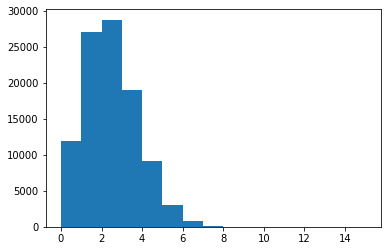

In [ ]:
import matplotlib.pyplot as plt
plt.hist(result, bins=range(0, 16))

In [ ]:
np.quantile(result, [0.025, 0.975])
#> array([0., 5.])

array([0., 5.])

#### 4.4.5.2 平均の差の信頼区間(confidence interval for the mean difference)

In [ ]:
import numpy as np
X = [32.1, 26.2, 27.5, 31.8, 32.1, 31.2, 30.1, 32.4, 32.3, 29.9,
     29.6, 26.6, 31.2, 30.9, 29.3]
Y = [35.4, 34.6, 31.1, 32.4, 33.3, 34.7, 35.3, 34.3, 32.1, 28.3,
     33.3, 30.5, 32.6, 33.3, 32.2]
Z = np.array(X) - np.array(Y) # 対標本として扱う．

n = 10**5
result = [np.random.choice(Z, len(Z), replace=True).mean() for _ in range(n)]

np.quantile(result, [0.025, 0.975])
#> array([-3.88666667, -1.55333333])

array([-3.88666667, -1.55333333])

(array([1.1000e+01, 6.2000e+01, 2.1400e+02, 7.4200e+02, 1.9100e+03,
        4.3900e+03, 8.6160e+03, 1.4480e+04, 1.8043e+04, 1.8964e+04,
        1.6025e+04, 9.5270e+03, 4.6890e+03, 1.7060e+03, 5.0400e+02,
        1.0300e+02, 1.2000e+01, 2.0000e+00]),
 array([-5.28666667, -4.99814815, -4.70962963, -4.42111111, -4.13259259,
        -3.84407407, -3.55555556, -3.26703704, -2.97851852, -2.69      ,
        -2.40148148, -2.11296296, -1.82444444, -1.53592593, -1.24740741,
        -0.95888889, -0.67037037, -0.38185185, -0.09333333]),
 <a list of 18 Patch objects>)

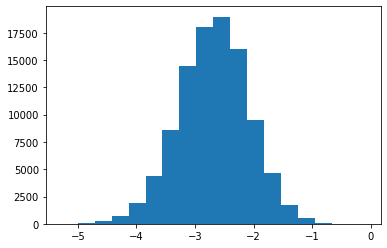

In [ ]:
plt.hist(result, bins='sturges')

In [ ]:
result = [np.random.choice(X, len(X), replace=True).mean() -
          np.random.choice(Y, len(Y), replace=True).mean()
          for _ in range(n)]
np.quantile(result, [0.025, 0.975])
#> array([-4.06, -1.3 ])

array([-4.05333333, -1.30666667])